# DATA ANALYSIS ON POKEMON DATASET

# Pre Processing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
Data=pd.read_csv('Pokemon.csv')
Data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
Data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
Data.shape

(800, 13)

In [7]:
Data.Name=Data.Name.str.replace(".*(?=Mega)","")

In [8]:
Data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
#filling missing values

In [10]:
Data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [11]:
Data['Type 2'].fillna(Data['Type 1'],inplace=True)

In [12]:
Data.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [13]:
ncolumns=Data.drop('Type 1',axis=1).corr()

# checking for class Imbalance

In [14]:
Data["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [15]:
Data["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

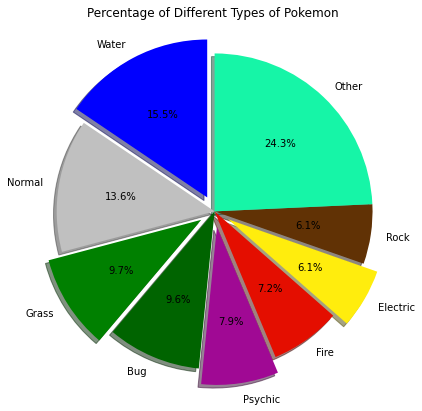

In [16]:
labels = 'Water','Normal','Grass','Bug','Psychic','Fire','Electric','Rock','Other'
sizes= [112,98,70,69,57,52,44,44,175]
colors = ['Blue','silver','Green','#006400','#A00994','#E40E00','#FFED0D','#613205','#16F5A7']
explode=(0.1,0.0,0.1,0,0.1,0.0,0.1,0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

# Checking for redundant values

<AxesSubplot:>

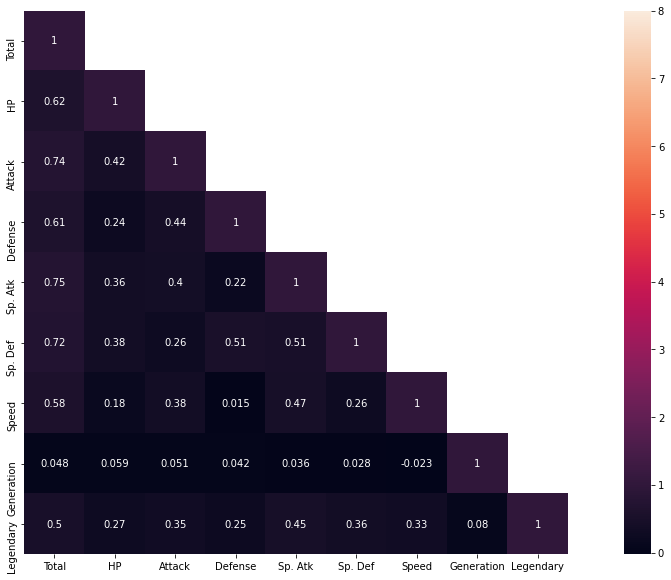

In [17]:
#correlation
corrmat=Data[['Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary']].corr()
mask=np.array(corrmat)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,mask=mask,vmax=8,square=True,annot=True)

# Removing categorical features

In [18]:
#to analyze non-categorical data effect on Type 1 and Type 2
new_Data=Data.copy()
new_Data.drop(["#","Total","Generation","Legendary"],1,inplace=True)
new_Data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,Fire,39,52,43,60,50,65


# Checking for Outliers

<AxesSubplot:>

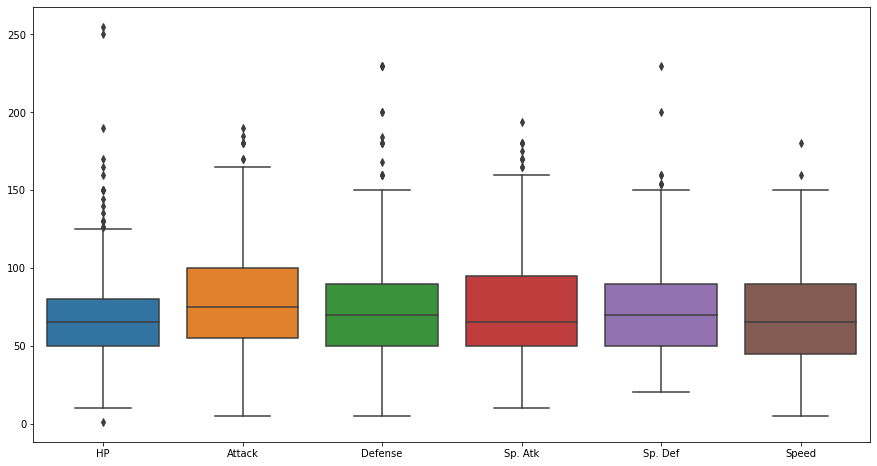

In [19]:
#Box plots are great way they show quartile ranges and Outliers
figure=plt.figure(figsize=(15,8))
sns.boxplot(data=new_Data)

# Visualizing Different attributes

In [20]:
def mean_attribute(type_no,attribute,dataframe):
    a=dataframe.groupby(type_no)[attribute].mean()
    df=pd.DataFrame(a)
    df=df.reset_index()
    df=df.sort_values(by=[attribute])
    fig,axes=plt.subplots(3,1)
    fig.set_size_inches(12,10)
    sns.stripplot(x=Data["Type 1"],y=Data["Total"],ax=axes[0],jitter=True)
    sns.boxplot(y=Data["Total"],x=Data["Type 1"],orient="v",ax=axes[1])
    sns.barplot(df[type_no],df[attribute],ax=axes[2])

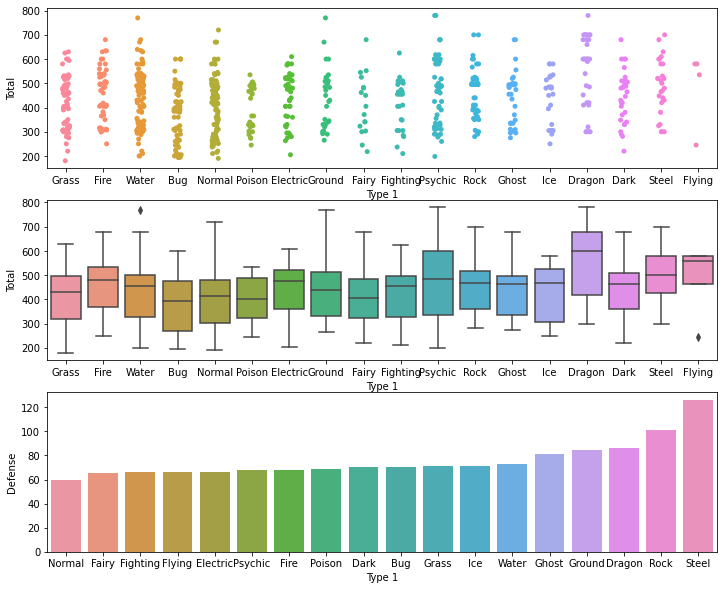

In [21]:
mean_attribute("Type 1","Defense",Data)

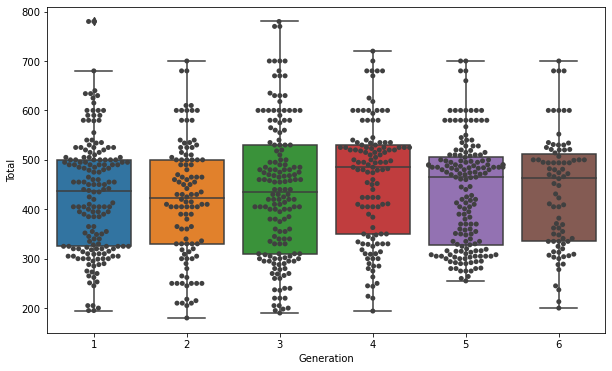

In [22]:
#checking if generation has any effect on total
figure=plt.figure(figsize=(10,6))
sns.boxplot(y="Total",x="Generation",data=Data)
ax=sns.swarmplot(x="Generation",y="Total",data=Data,color=".25")

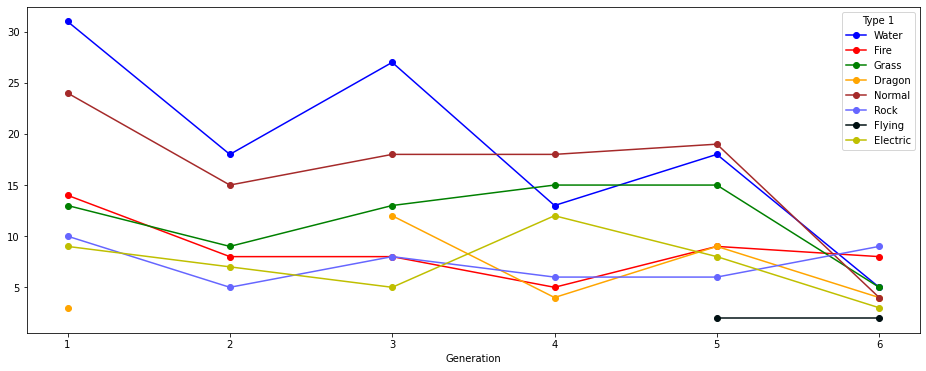

In [23]:
#checking how each type of pokemon depend on generation
a=Data.groupby(['Generation','Type 1']).count().reset_index()
a=a[['Generation','Type 1','Total']]
a=a.pivot('Generation','Type 1','Total')
a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

In [24]:
Data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [25]:
Data = Data.reset_index()

In [26]:
Data.corr()['Legendary'].sort_values(ascending=False)

Legendary     1.000000
Total         0.501758
Sp. Atk       0.448907
Sp. Def       0.363937
Attack        0.345408
Speed         0.326715
HP            0.273620
Defense       0.246377
index         0.154336
#             0.153396
Generation    0.079794
Name: Legendary, dtype: float64

In [27]:
Data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [28]:
Data.isna().sum()

index         0
#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [29]:
Data.fillna(999, inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
Data['Legendary'] = LabelEncoder().fit_transform(Data['Legendary'])

In [32]:
Data1 = Data.loc[:, Data.columns.isin(['Legendary' , 'Name','Type 1','Type 2','Total','Attack','Sp. Atk','Sp. Def','Speed'])]

# Prediction using random forest

In [33]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

In [34]:
Data1 = Data1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [35]:
Data1=np.nan_to_num(Data1, nan=-9999, posinf=33333333, neginf=33333333)

In [36]:
Data1 = pd.DataFrame(Data1)

In [37]:
Data1.columns = ['Name','Type 1','Type 2','Total','Attack','Sp. Atk','Sp. Def','Speed','Legendary']

In [38]:
Data1

,Name,Type 1,Type 2,Total,Attack,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,Grass,Poison,318,49,65,65,45,0
1,Ivysaur,Grass,Poison,405,62,80,80,60,0
2,Venusaur,Grass,Poison,525,82,100,100,80,0
3,Mega Venusaur,Grass,Poison,625,100,122,120,80,0
4,Charmander,Fire,Fire,309,52,60,50,65,0
...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,100,100,150,50,1
796,Mega Diancie,Rock,Fairy,700,160,160,110,110,1
797,HoopaHoopa Confined,Psychic,Ghost,600,110,150,130,70,1
798,HoopaHoopa Unbound,Psychic,Dark,680,160,170,130,80,1


In [39]:
#splitting data into train and test
X = Data1.drop(columns=['Legendary'])

y = Data1['Legendary']
y=y.astype('int')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,shuffle=True)

In [40]:
X.head()

,Name,Type 1,Type 2,Total,Attack,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,318,49,65,65,45
1,Ivysaur,Grass,Poison,405,62,80,80,60
2,Venusaur,Grass,Poison,525,82,100,100,80
3,Mega Venusaur,Grass,Poison,625,100,122,120,80
4,Charmander,Fire,Fire,309,52,60,50,65


In [41]:
#using decision tree classifier
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2])],remainder='drop')

step2 = DecisionTreeClassifier(random_state=3,max_features=0.75,max_depth=15)

pipe = Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X,y)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.6095179987797439
MAE 0.025


pip install streamlit

In [42]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pickle 
Data1.to_csv("Data1.csv", index=False) 
pickle.dump(pipe,open('pipe.pkl','wb'))

In [44]:
Data1.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'Attack', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Legendary'],
      dtype='object')